# Demographic Research Methods and the PyCCM Library
## Computer Lab 2: Building lifetables in Python
## Instructor: Jiani Yan
## Date: October 28th, 2025
---

In this class, we are going to learn about how to make lifetables in Python. We will try to finish both sections in the class, but it might be that Section 2/3/4/5/6/7 should be done as a 'class homework'. Full solutions for all sections will either be presented at the start of the second day, or at the end of the class, time permitting.

Every ~15 minutes we'll stretch our legs, drink some water, and then live code up some answers so everybody can catch up. Relax, you're doing great!

## 1. Section 1: Vanilla lifetables

---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
from pathlib import Path

# Add src directory to path
src_path = Path.cwd().parents[2]/'src'
data_path = Path.cwd().parents[2]/'data'

In [3]:
import os 
print(src_path)
os.chdir(src_path)

/Users/valler/Python/PyCCM/src


In [4]:
# Import PyCCM functions
from data_loaders import load_all_data
from mortality import make_lifetable

age_order = ["0-4","5-9","10-14","15-19",
             "20-24","25-29","30-34","35-39",
             "40-44","45-49","50-54","55-59",
             "60-64","65-69","70-74","75-79",
             '80-84', '85-89', '90+']


#### 1.1.1 Load in the conteos.rds file, using the data_loaders module or otherwise.

In [5]:
# <Your answer goes here>
df = load_all_data(data_path)['conteos']
df = pd.DataFrame(df)

In [7]:
df.head(10)

,OMISION,DPTO_NOMBRE,DPTO_CODIGO,ANO,EDAD,VARIABLE,VALOR,FUENTE,SEXO
0,1.0,ANTIOQUIA,5.0,2005.0,0-4,nacimientos_extranjeros,707.0,censo_2005,1.0
1,1.0,ANTIOQUIA,5.0,2005.0,0-4,poblacion_total,261320.0,censo_2005,1.0
2,1.0,ANTIOQUIA,5.0,2005.0,0-4,nacimientos_extranjeros,642.0,censo_2005,2.0
3,1.0,ANTIOQUIA,5.0,2005.0,0-4,poblacion_total,249144.0,censo_2005,2.0
4,1.0,ANTIOQUIA,5.0,2005.0,5-9,nacimientos_extranjeros,502.0,censo_2005,1.0
5,1.0,ANTIOQUIA,5.0,2005.0,5-9,poblacion_total,278590.0,censo_2005,1.0
6,1.0,ANTIOQUIA,5.0,2005.0,5-9,nacimientos_extranjeros,485.0,censo_2005,2.0
7,1.0,ANTIOQUIA,5.0,2005.0,5-9,poblacion_total,267228.0,censo_2005,2.0
8,1.0,ANTIOQUIA,5.0,2005.0,10-14,nacimientos_extranjeros,662.0,censo_2005,1.0
9,1.0,ANTIOQUIA,5.0,2005.0,10-14,poblacion_total,290036.0,censo_2005,1.0


#### 1.1.2 Filter for censos_2018 and the year 2018 for exposures and deaths

In [9]:
df['EDAD'].unique() # show the unique values 

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90+', nan, '0-1', '2-4'], dtype=object)

In [8]:
# <Your answer goes here>
year = 2018 
df = df[(df['FUENTE']=='censo_2018') & (df['ANO']==2018) ]
df.head(10) # show the first 10 lines of df 

,OMISION,DPTO_NOMBRE,DPTO_CODIGO,ANO,EDAD,VARIABLE,VALOR,FUENTE,SEXO
2508,1.0,ANTIOQUIA,5.0,2018.0,0-4,nacimientos_extranjeros,4575.0,censo_2018,1.0
2509,1.0,ANTIOQUIA,5.0,2018.0,0-4,poblacion_total,176817.0,censo_2018,1.0
2510,1.0,ANTIOQUIA,5.0,2018.0,0-4,nacimientos_extranjeros,4197.0,censo_2018,2.0
2511,1.0,ANTIOQUIA,5.0,2018.0,0-4,poblacion_total,168516.0,censo_2018,2.0
2512,1.0,ATLANTICO,8.0,2018.0,0-4,nacimientos_extranjeros,6404.0,censo_2018,1.0
2513,1.0,ATLANTICO,8.0,2018.0,0-4,poblacion_total,91708.0,censo_2018,1.0
2514,1.0,ATLANTICO,8.0,2018.0,0-4,nacimientos_extranjeros,6284.0,censo_2018,2.0
2515,1.0,ATLANTICO,8.0,2018.0,0-4,poblacion_total,88205.0,censo_2018,2.0
2516,1.0,BOGOTA,11.0,2018.0,0-4,nacimientos_extranjeros,8141.0,censo_2018,1.0
2517,1.0,BOGOTA,11.0,2018.0,0-4,poblacion_total,211128.0,censo_2018,1.0


#### 1.1.3 Filter for your favourite DPTO

In [12]:
# <Your answer goes here>
dpto = "BOLIVAR"
df_dpto = df[df["DPTO_NOMBRE"]==dpto].copy()
df_dpto

,OMISION,DPTO_NOMBRE,DPTO_CODIGO,ANO,EDAD,VARIABLE,VALOR,FUENTE,SEXO
2520,1.0,BOLIVAR,13.0,2018.0,0-4,nacimientos_extranjeros,3430.0,censo_2018,1.0
2521,1.0,BOLIVAR,13.0,2018.0,0-4,poblacion_total,82492.0,censo_2018,1.0
2522,1.0,BOLIVAR,13.0,2018.0,0-4,nacimientos_extranjeros,3287.0,censo_2018,2.0
2523,1.0,BOLIVAR,13.0,2018.0,0-4,poblacion_total,78847.0,censo_2018,2.0
2652,1.0,BOLIVAR,13.0,2018.0,5-9,nacimientos_extranjeros,3938.0,censo_2018,1.0
...,...,...,...,...,...,...,...,...,...
7551,1.0,BOLIVAR,13.0,2018.0,85-89,defunciones,403.0,censo_2018,2.0
7615,1.0,BOLIVAR,13.0,2018.0,90+,defunciones,437.0,censo_2018,1.0
7616,1.0,BOLIVAR,13.0,2018.0,90+,defunciones,516.0,censo_2018,2.0
7680,1.0,BOLIVAR,13.0,2018.0,NaN,defunciones,3.0,censo_2018,1.0


### 1.2 Create a new dataframe which has three columns: age, exposures, deaths

In [14]:
# <Your answer goes here>
df_dpto.loc[df_dpto['VARIABLE'] == "defunciones",'EDAD'].unique()

array(['0-1', '10-14', '15-19', '2-4', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '5-9', '50-54', '55-59', '60-64', '65-69',
       '70-74', '75-79', '80-84', '85-89', '90+', nan], dtype=object)

In [15]:
# <Your answer goes here>
df_dpto.loc[df_dpto['VARIABLE'] == "poblacion_total",'EDAD'].unique()

array(['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39',
       '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74',
       '75-79', '80-84', '85-89', '90+', nan], dtype=object)

In [16]:
deaths_0_1 = df_dpto[df_dpto['EDAD']=='0-1']["VALOR"].sum()
deaths_2_4 = df_dpto[df_dpto['EDAD']=='2-4']["VALOR"].sum()

In [17]:
template_row = df_dpto[df_dpto['VARIABLE'] == "defunciones"].iloc[0].copy()
new_index = df_dpto.index.max()+1

In [20]:
df_dpto.loc[new_index] = template_row 
df_dpto.loc[new_index,'EDAD'] = "0-4"
df_dpto.loc[new_index,'VALOR'] = deaths_0_1+deaths_2_4

In [21]:
df_dpto.loc[new_index]

OMISION                1.0
DPTO_NOMBRE        BOLIVAR
DPTO_CODIGO           13.0
ANO                 2018.0
EDAD                   0-4
VARIABLE       defunciones
VALOR                725.0
FUENTE          censo_2018
SEXO                   1.0
Name: 7682, dtype: object

In [22]:
df_dpto = df_dpto.loc[~df_dpto['EDAD'].isin(['0-1','2-4'])]

In [28]:
df_summed = df_dpto.groupby(['EDAD','VARIABLE'])['VALOR'].sum().reset_index()

In [32]:
# transfrom from long format to wide format 
df_summed= df_summed.pivot(index= 'EDAD',columns='VARIABLE',values='VALOR').reset_index() 

In [33]:
age_order = ["0-4","5-9","10-14","15-19",
             "20-24","25-29","30-34","35-39",
             "40-44","45-49","50-54","55-59",
             "60-64","65-69","70-74","75-79",
             '80-84', '85-89', '90+']


In [34]:
lt = df_summed.rename(columns= {"EDAD":'age',
                                'poblacion_total':'exposures',
                                'defunciones':'deaths'}).copy()
lt = lt[['age','exposures','deaths']] # only select relevant columns 

In [44]:
# sorting by age 
lt['age'] = pd.Categorical(lt['age'],categories=age_order,ordered=True)
lt = lt.sort_values('age').reset_index(drop=True)
lt

VARIABLE,age,exposures,deaths
0,0-4,161339.0,725.0
1,5-9,175014.0,75.0
2,10-14,177561.0,78.0
3,15-19,176914.0,147.0
4,20-24,165363.0,255.0
5,25-29,154206.0,239.0
6,30-34,138111.0,239.0
7,35-39,129599.0,222.0
8,40-44,111923.0,223.0
9,45-49,106967.0,275.0


### 1.3 Drop any deaths which are not attributable to ages.

In [47]:
lt = lt.loc[lt['exposures'].notnull(),]

### 1.4 Create a basic m_x column

In [45]:
# <Your answer goes here>
lt['m_x'] = lt['deaths']/lt['exposures']

### 1.5 Convert this to q_x using the Greville equation (use a reasonable a_x)

In [52]:
lt['n'] = 5 
lt['a_x'] = 2.5  

In [57]:
lt.loc[0,'a_x'] = 0.1397*5 

In [58]:
lt['q_x'] = (lt['n']*lt['m_x']) / (1 + (lt['n'] - lt['a_x'])*lt['m_x'])

### 1.6 Convert this to q_x using the Greville equation (use a reasonable a_x)

In [59]:
lt.loc[lt.index[-1], 'q_x'] = 1 # open-ended interval for the last age group

### 1.6 Set a radix, and calculate a l_x column.

In [60]:
# <Your answer goes here>
radix = 100000

In [61]:
lt['l_x'] = 0 
lt.loc[0,'l_x'] = radix 

In [69]:
lt.head()

VARIABLE,age,exposures,deaths,m_x,n,a_x,q_x,l_x,d_x
0,0-4,161339.0,725.0,0.004494,5,0.6985,0.022042,100000.000000,2204.215722
1,5-9,175014.0,75.0,0.000429,5,2.5000,0.002140,97795.784278,209.321376
2,10-14,177561.0,78.0,0.000439,5,2.5000,0.002194,97586.462902,214.106531
3,15-19,176914.0,147.0,0.000831,5,2.5000,0.004146,97372.356371,403.700792
4,20-24,165363.0,255.0,0.001542,5,2.5000,0.007681,96968.655579,744.787129


In [67]:
lt['l_x'] = lt['l_x'].astype(float)

In [68]:
for i in range(len(lt)-1):
    lt.loc[i+1,'l_x'] = lt.loc[i,'l_x'] * (1-lt.loc[i,'q_x'])

### 1.7 Calculate a d_x from this.

In [66]:
lt['d_x'] = lt['l_x'] * lt['q_x']

### 1.8 Build a L_x column

In [75]:
lt['L_x'] = 0 
lt['L_x'] = lt['L_x'].astype(float)

for i in range(len(lt)-1):
    n_i = lt.loc[i,'n'] 
    lt.loc[i,'L_x'] = (n_i * lt.loc[i+1,'l_x']) + (lt.loc[i,'d_x']* lt.loc[i,'a_x'])

In [77]:
lt

VARIABLE,age,exposures,deaths,m_x,n,a_x,q_x,l_x,d_x,L_x
0,0-4,161339.0,725.0,0.004494,5,0.6985,0.022042,100000.000000,2204.215722,490518.566071
1,5-9,175014.0,75.0,0.000429,5,2.5000,0.002140,97795.784278,209.321376,488455.617948
2,10-14,177561.0,78.0,0.000439,5,2.5000,0.002194,97586.462902,214.106531,487397.048180
3,15-19,176914.0,147.0,0.000831,5,2.5000,0.004146,97372.356371,403.700792,485852.529873
4,20-24,165363.0,255.0,0.001542,5,2.5000,0.007681,96968.655579,744.787129,482981.310070
5,25-29,154206.0,239.0,0.001550,5,2.5000,0.007719,96223.868449,742.796660,479262.350596
6,30-34,138111.0,239.0,0.001730,5,2.5000,0.008615,95481.071789,822.587518,475348.890149
7,35-39,129599.0,222.0,0.001713,5,2.5000,0.008528,94658.484271,807.281509,471274.217581
8,40-44,111923.0,223.0,0.001992,5,2.5000,0.009913,93851.202762,930.330956,466930.186418
9,45-49,106967.0,275.0,0.002571,5,2.5000,0.012772,92920.871806,1186.817074,461637.316343


### 1.9 From the L_x column, calculate the T_x

In [79]:
lt['T_x'] = 0.0

last_idx = len(lt)-1 
lt.loc[last_idx, 'T_x'] = lt.loc[last_idx, 'L_x'] # set the last T_x = L_x

for i in range(len(lt)-2, -1, -1):
    lt.loc[i,'T_x'] = lt.loc[i,'L_x']+lt.loc[i+1,'T_x']

In [80]:
lt['e_x'] = lt['T_x']/lt['l_x']

In [81]:
lt

VARIABLE,age,exposures,deaths,m_x,n,a_x,q_x,l_x,d_x,L_x,T_x,e_x
0,0-4,161339.0,725.0,0.004494,5,0.6985,0.022042,100000.000000,2204.215722,490518.566071,7.754031e+06,77.540315
1,5-9,175014.0,75.0,0.000429,5,2.5000,0.002140,97795.784278,209.321376,488455.617948,7.263513e+06,74.272250
2,10-14,177561.0,78.0,0.000439,5,2.5000,0.002194,97586.462902,214.106531,487397.048180,6.775057e+06,69.426200
3,15-19,176914.0,147.0,0.000831,5,2.5000,0.004146,97372.356371,403.700792,485852.529873,6.287660e+06,64.573360
4,20-24,165363.0,255.0,0.001542,5,2.5000,0.007681,96968.655579,744.787129,482981.310070,5.801808e+06,59.831784
5,25-29,154206.0,239.0,0.001550,5,2.5000,0.007719,96223.868449,742.796660,479262.350596,5.318826e+06,55.275541
6,30-34,138111.0,239.0,0.001730,5,2.5000,0.008615,95481.071789,822.587518,475348.890149,4.839564e+06,50.686109
7,35-39,129599.0,222.0,0.001713,5,2.5000,0.008528,94658.484271,807.281509,471274.217581,4.364215e+06,46.104849
8,40-44,111923.0,223.0,0.001992,5,2.5000,0.009913,93851.202762,930.330956,466930.186418,3.892941e+06,41.479926
9,45-49,106967.0,275.0,0.002571,5,2.5000,0.012772,92920.871806,1186.817074,461637.316343,3.426011e+06,36.870196


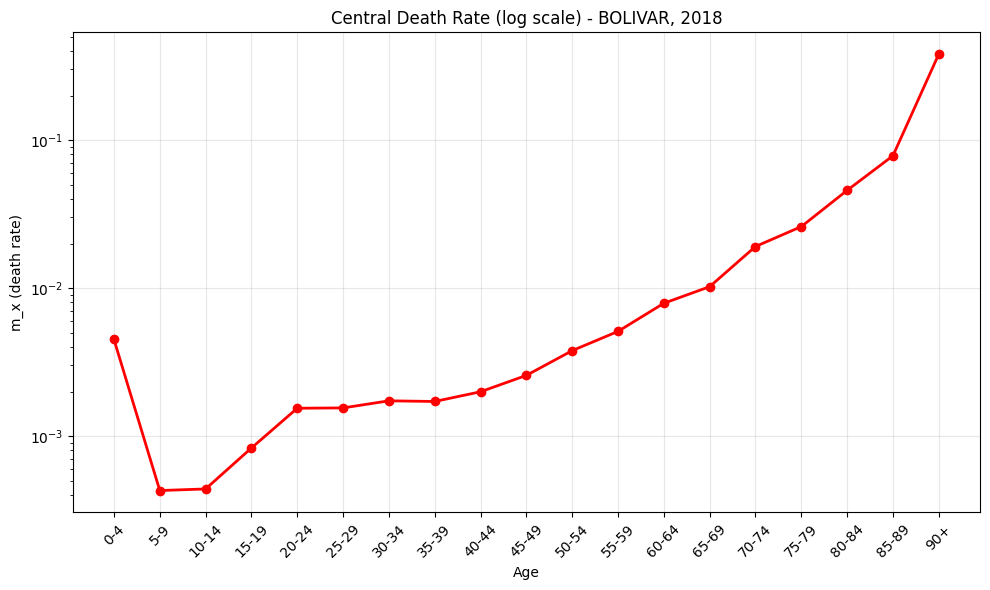

In [83]:

# Plot 1: m_x (log scale)
plt.figure(figsize=(10, 6))
plt.plot(lt['age'], lt['m_x'], 'o-', color='red', linewidth=2)
plt.xlabel('Age')
plt.ylabel('m_x (death rate)')
plt.title(f'Central Death Rate (log scale) - {dpto}, {year}')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.10 Finally, build a life expectancy column.

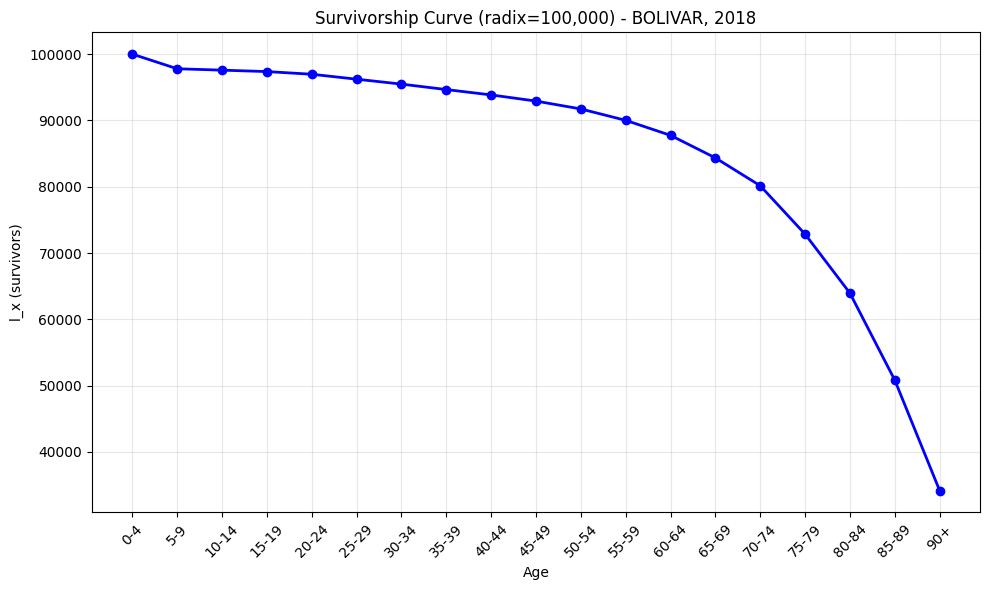

In [85]:

# Plot 3: l_x (survivorship)
plt.figure(figsize=(10, 6))
plt.plot(lt['age'], lt['l_x'], 'o-', color='blue', linewidth=2)
plt.xlabel('Age')
plt.ylabel('l_x (survivors)')
plt.title(f'Survivorship Curve (radix={radix:,}) - {dpto}, {year}')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2. Visualise these columns (and their logged values). What can you see?

In [13]:
# <Your answer goes here>

### 3. Can you re-run this by constructing a midpoint between the two death counts?

In [14]:
# <Your answer goes here>

### 4. How does PyCCM use moving averages to smooth lifetable values? How can you incorporate this into your code?

In [15]:
# <Your answer goes here>

### 5. How does PyCCM use mortality improvements? How can you incorporate this into your code?

In [16]:
# <Your answer goes here>

### 6. Can you modularise your work into a function? This will be useful for the final lab!

In [17]:
# <Your answer goes here>

### 7. Loop over multiple DPTOs. Store your m_x and e_0 values. Plot them in a 1x2 figure.

In [18]:
# <Your answer goes here>